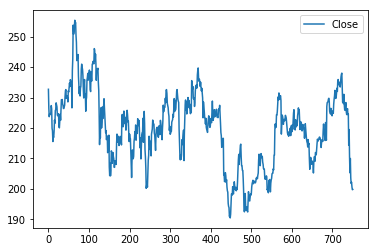

In [196]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, numpy.random
import cvxopt as opt
from cvxopt import blas, solvers
import os, random

assets = [] # 3 random assets' expected return
# read a random file
# df1 = pd.read_csv('stock_dfs/'+random.choice(os.listdir("stock_dfs/")), usecols=['Date', 'Close'])
df1 = pd.read_csv('stock_dfs/VOD.csv', usecols=['Date', 'Close'])
df1.plot()
# df1.head()

In [197]:
## use first half of 3 stocks to find expected return and covariances
# asset's first half expected return function
def half_expected_return(df, assets):
    df = df[:-len(df)/2] # drop second half
    returns = (df.Close - df.Close.shift(1))/df.Close
    returns = returns.dropna()
    assets.append(returns.mean())
    
    return returns
returns1 = half_expected_return(df1, assets)
print returns1
print assets

1     -0.027373
2     -0.012517
3      0.004450
4     -0.001337
5      0.001335
6      0.001333
7      0.010336
8     -0.004862
9     -0.028877
10    -0.003651
11    -0.016469
12     0.007597
13    -0.001383
14     0.009363
15     0.016397
16    -0.004739
17     0.018605
18     0.001106
19     0.009858
20    -0.002636
21    -0.003084
22    -0.012040
23    -0.001116
24     0.003115
25    -0.001560
26    -0.017691
27    -0.001818
28     0.009676
29     0.010686
30    -0.009211
         ...   
345   -0.009879
346    0.005893
347   -0.011033
348    0.005704
349   -0.009747
350   -0.004450
351    0.004210
352   -0.002443
353    0.044364
354   -0.002767
355   -0.009454
356    0.003853
357   -0.016757
358   -0.000871
359    0.001740
360   -0.012728
361    0.005606
362    0.016412
363    0.006845
364   -0.002358
365    0.004270
366   -0.004719
367    0.018113
368    0.006071
369    0.003546
370   -0.013745
371   -0.004674
372    0.002754
373   -0.004042
374   -0.005992
Name: Close, Length: 374

,Date,Close
0,2015-02-23,1198.0
1,2015-02-24,1237.0
2,2015-02-25,1225.0
3,2015-02-26,1218.0
4,2015-02-27,1210.0


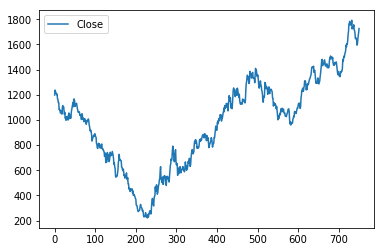

In [198]:
df2 = pd.read_csv('stock_dfs/AAL.csv', usecols=['Date', 'Close'])
df2.plot()
df2.head()

In [199]:
returns2 = half_expected_return(df2, assets)
print returns2

1      0.031528
2     -0.009796
3     -0.005747
4     -0.006612
5     -0.007494
6      0.002906
7     -0.032134
8     -0.002147
9     -0.025088
10     0.001757
11    -0.052242
12     0.003685
13    -0.006024
14    -0.022749
15     0.000474
16     0.014932
17    -0.001870
18    -0.022467
19     0.049523
20     0.012118
21    -0.018747
22     0.009959
23    -0.026010
24    -0.031130
25     0.015094
26    -0.047431
27     0.004427
28    -0.019559
29     0.027791
30     0.000974
         ...   
345    0.026008
346   -0.022531
347    0.036993
348   -0.008731
349   -0.004928
350   -0.022616
351   -0.050620
352    0.016885
353   -0.001335
354   -0.013986
355    0.008055
356    0.021396
357    0.051507
358   -0.014570
359    0.021560
360   -0.016527
361    0.000479
362    0.011361
363    0.017328
364    0.017594
365    0.004209
366   -0.002395
367    0.009041
368   -0.032676
369    0.018105
370    0.019438
371   -0.028070
372    0.016250
373   -0.011494
374   -0.041916
Name: Close, Length: 374

[-9.756185181643971e-05, -0.0020477100530882264, 0.0008091798101394814]


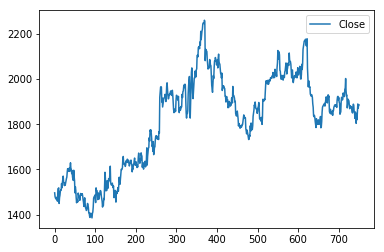

In [200]:
df3 = pd.read_csv('stock_dfs/ADM.csv', usecols=['Date', 'Close'])
returns3 = half_expected_return(df3, assets)
print assets
df3.plot()

In [201]:
# find covariance of 3 assets
np.cov(np.array([returns1.values, returns2.values, returns3.values]))

array([[2.17421103e-04, 1.62632372e-04, 9.49869781e-05],
       [1.62632372e-04, 2.17623356e-03, 1.87710874e-04],
       [9.49869781e-05, 1.87710874e-04, 2.56302610e-04]])

In [202]:
np.array([returns1.values, returns2.values, returns3.values])

array([[-0.02737307, -0.01251676,  0.00445038, ...,  0.00275424,
        -0.00404169, -0.00599187],
       [ 0.03152789, -0.00979592, -0.00574713, ...,  0.01625   ,
        -0.01149425, -0.04191617],
       [-0.01149425, -0.00407332, -0.00272294, ...,  0.02346316,
        -0.00046948, -0.00282486]])

In [203]:
returns3.shape

(374,)